# Basic Usage

GraphLog can be used as a regular Python module to access the datasets used
in the paper ["Evaluating Logical Generalization in Graph Neural Networks"](#archive).
Additionally, GraphLog also provides necessary [torch.utils.data.Dataset](https://pytorch.org/docs/stable/data.html?highlight=dataset#torch.utils.data.Dataset) and 
[torch.utils.data.DataLoader](https://pytorch.org/docs/stable/data.html?highlight=dataloader#torch.utils.data.DataLoader) packages for easy training and evaluation.

### Loading the data

When GraphLog is imported for the first time, it downloads the data
and creates a ``./data`` directory in the current working directory. 
The downloaded data is then unzipped and placed within this directory.

In [1]:
from graphlog import GraphLog
gl = GraphLog()

To change the data directory, pass the ``data_dir`` flag.

In [ ]:
gl = GraphLog(data_dir='/tmp/data')

### Viewing the data

GraphLog consists of multiple `datasets`. Each dataset is built using its own
set of **rules**, which themselves are procedurally generated and sampled from
a large knowledge-base.

To view all possible datasets in GraphLog:

In [ ]:
gl.get_dataset_names_by_split()

This will provide a list of dataset ids in train, valid and test splits.
To load a single dataset, use the ``get_dataset_by_name`` method:

In [2]:
rule_3 = gl.get_dataset_by_name('rule_3')
type(rule_3)

graphlog.dataset.GraphLogDataset

This will load a ``GraphLogDataset`` object, which is in-turn a Pytorch ``Dataset``
instance. Each dataset also has its own training, validation and test splits.

The ``GraphLogDataset`` object essentially contains [Pytorch Geometric](https://github.com/rusty1s/pytorch_geometric) graphs,
a query tuple of ``<source, sink>`` nodes for each datapoint, and a label or relation to predict. 

You can also view the aggregate statistics of the dataset:

In [3]:
gl.compute_stats_by_dataset("rule_3")

Data Split : train, Number of Classes : 16, Number of Descriptors : 189, Average Resolution Length : 3.632142857142857, Average number of nodes : 11.137  and edges : 13.273


{'num_class': 16,
 'num_des': 189,
 'avg_resolution_length': 3.632142857142857,
 'num_nodes': 11.137,
 'num_edges': 13.273,
 'split': 'train'}

You can also convert the dataset into [networkx](https://networkx.github.io/) format, in order to perform quick calculations or visualization:

In [ ]:
import networkx as nx
from graphlog.utils import load_networkx_graphs
nx_graphs, nx_queries = load_networkx_graphs(rule_3.json_graphs["train"])

In [ ]:
nx.info(nx_graphs[0])

To view a single graph in the dataset, you can also use the inbuilt `display_single_graph` api.

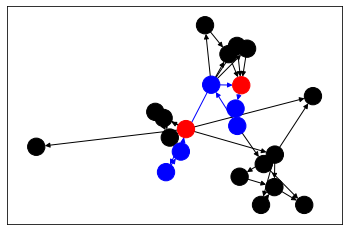

In [3]:
gl.display_single_graph(rule_3, "train",21)

### Extracting dataloaders

We provide a method to generate dataloaders for each dataset as follows:

In [ ]:
rule_3_train = gl.get_dataloader_by_mode(rule_3, mode="train")
rule_3_valid = gl.get_dataloader_by_mode(rule_3, mode="valid")
rule_3_test = gl.get_dataloader_by_mode(rule_3, mode="test")

### Supervised Training

A very minimal dummy training script is provided below to show how easy it is to train your models.

In [ ]:
for batch_idx, batch in enumerate(rule_3_train):
    graphs = batch.graphs
    queries = batch.queries
    targets = batch.targets
    world_graphs = batch.world_graphs
    logits = your_model(graphs, queries, world_graphs)